# Data Acquisition

In [ ]:
import urllib
import zipfile
import polars as pl
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
zip_target_folder = "electricity"
!mkdir -p $zip_target_folder

In [ ]:
zip_filepath = "electricity.zip"

url_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/00321/LD2011_2014.txt.zip"
urllib.request.urlretrieve(url_path, zip_filepath)

with zipfile.ZipFile(zip_filepath, "r") as zip_ref:
    zip_ref.extractall(zip_target_folder)

In [ ]:
!ls $zip_target_folder

LD2011_2014.txt  __MACOSX


In [ ]:
!wc -l "$zip_target_folder/LD2011_2014.txt"

140257 electricity/LD2011_2014.txt


In [ ]:
data_filepath = f"{zip_target_folder}/LD2011_2014.txt"
dataset_size = 140257

reader_properties = {
    "separator": ";",
    "decimal_comma": True,
    "infer_schema_length": dataset_size
}

df = pl.read_csv(data_filepath, **reader_properties)

df.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,MT_011,MT_012,MT_013,MT_014,MT_015,MT_016,MT_017,MT_018,MT_019,MT_020,MT_021,MT_022,MT_023,MT_024,MT_025,MT_026,MT_027,MT_028,MT_029,MT_030,MT_031,MT_032,MT_033,MT_034,MT_035,MT_036,…,MT_334,MT_335,MT_336,MT_337,MT_338,MT_339,MT_340,MT_341,MT_342,MT_343,MT_344,MT_345,MT_346,MT_347,MT_348,MT_349,MT_350,MT_351,MT_352,MT_353,MT_354,MT_355,MT_356,MT_357,MT_358,MT_359,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""2011-01-01 00:15:00""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""2011-01-01 00:30:00""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""2011-01-01 00:45:00""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""2011-01-01 01:00:00""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""2011-01-01 01:15:00""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Preprocessing

In [ ]:
df = df.rename({
    "": "Timestamp"
})

df.head()

Timestamp,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,MT_011,MT_012,MT_013,MT_014,MT_015,MT_016,MT_017,MT_018,MT_019,MT_020,MT_021,MT_022,MT_023,MT_024,MT_025,MT_026,MT_027,MT_028,MT_029,MT_030,MT_031,MT_032,MT_033,MT_034,MT_035,MT_036,…,MT_334,MT_335,MT_336,MT_337,MT_338,MT_339,MT_340,MT_341,MT_342,MT_343,MT_344,MT_345,MT_346,MT_347,MT_348,MT_349,MT_350,MT_351,MT_352,MT_353,MT_354,MT_355,MT_356,MT_357,MT_358,MT_359,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""2011-01-01 00:15:00""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""2011-01-01 00:30:00""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""2011-01-01 00:45:00""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""2011-01-01 01:00:00""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""2011-01-01 01:15:00""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
selected_cols_df = df.select(
    pl.col("Timestamp").str.to_datetime().alias("ts"),
    pl.col("MT_001").alias("value")
)

selected_cols_df.head()

ts,value
datetime[μs],f64
2011-01-01 00:15:00,0.0
2011-01-01 00:30:00,0.0
2011-01-01 00:45:00,0.0
2011-01-01 01:00:00,0.0
2011-01-01 01:15:00,0.0


In [ ]:
downscaling_frequency = "1d"
downscaled_df = selected_cols_df.group_by_dynamic("ts", every=downscaling_frequency).agg(pl.col("value").sum())

print("Dataset size:", len(downscaled_df))
print()

downscaled_df.head()

Dataset size: 1462



ts,value
datetime[μs],f64
2011-01-01 00:00:00,0.0
2011-01-02 00:00:00,0.0
2011-01-03 00:00:00,0.0
2011-01-04 00:00:00,0.0
2011-01-05 00:00:00,0.0


In [ ]:
downscaled_df.null_count()

ts,value
u32,u32
0,0


In [ ]:
preprocessed_df = downscaled_df

# Data Representation

In [ ]:
serie = preprocessed_df["value"]

In [ ]:
scaler = MinMaxScaler()

scaled_serie = scaler.fit_transform(serie.to_numpy().reshape(-1, 1)).flatten()
scaled_serie[:5]

array([0., 0., 0., 0., 0.])

In [ ]:
def create_forecast_serie_sets(serie, window_sizes):
    serie_size = len(serie)
    n_windows = len(window_sizes)
    total_window_sizes = sum(window_sizes)

    xs = [[] for i in range(n_windows)]

    for i in range(serie_size - total_window_sizes):
        window_low_idx = i
        for x, window_size in zip(xs, window_sizes):
            window_max_idx = window_low_idx + window_size
            x.append(serie[window_low_idx:window_max_idx])
            window_low_idx = window_max_idx

    return [np.array(x) for x in xs]

context_window_size = 5
forecast_horizon = 1
X, y = create_forecast_serie_sets(scaled_serie, (context_window_size, forecast_horizon))

In [ ]:
print("Features dataset size:", len(X))

X

Features dataset size: 1456


array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       ...,
       [0.10182371, 0.09042553, 0.12765957, 0.1268997 , 0.13601824],
       [0.09042553, 0.12765957, 0.1268997 , 0.13601824, 0.14893617],
       [0.12765957, 0.1268997 , 0.13601824, 0.14893617, 0.13905775]])

In [ ]:
print("Forecast dataset size:", len(y))

y

Forecast dataset size: 1456


array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.14893617],
       [0.13905775],
       [0.13753799]])

In [ ]:
train_set_size = int(len(X) * 0.8)
train_set_size

1164

In [ ]:
X_train, y_train = X[:train_set_size], y[:train_set_size]
X_test, y_test = X[train_set_size:], y[train_set_size:]

# Modelization

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, LSTM

In [ ]:
forecast_horizon = 1
lstm_n_units = 64

In [ ]:
model = Sequential([
    Input((window_size, 1)),
    LSTM(lstm_n_units),
    Dense(forecast_horizon)
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

fitting_batch_size = 32
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=fitting_batch_size)

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0688 - mae: 0.1624 - val_loss: 0.0118 - val_mae: 0.0664
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0258 - mae: 0.0904 - val_loss: 0.0112 - val_mae: 0.0464
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0227 - mae: 0.0777 - val_loss: 0.0103 - val_mae: 0.0477
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0169 - mae: 0.0668 - val_loss: 0.0092 - val_mae: 0.0491
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0185 - mae: 0.0702 - val_loss: 0.0104 - val_mae: 0.0450
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0176 - mae: 0.0682 - val_loss: 0.0096 - val_mae: 0.0464
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0168 - mae: 0.0673 - val_loss: 0.0096 - val_mae: 0.0459
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0163 - mae: 0.0676 - val_loss: 0.0077 - val_mae: 0.0447
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0176 - m

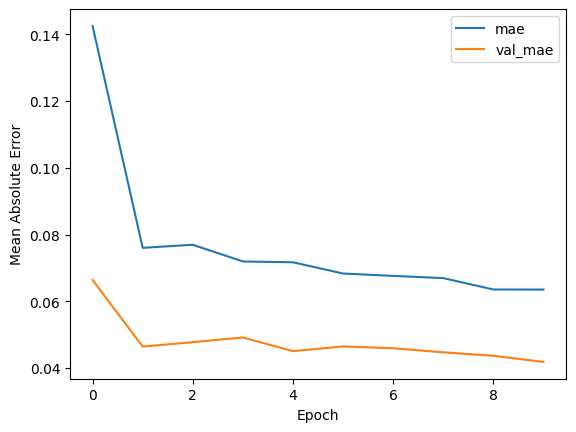

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["mae"])
plt.plot(history.history["val_mae"])
plt.legend(["mae", "val_mae"])
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")
plt.show()

# Evaluation

In [ ]:
loss, mae = model.evaluate(X_test, y_test)

print("Evaluation Loss:", loss)
print("Evaluation MAE:", mae)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0263 - mae: 0.1001 
Evaluation Loss: 0.021096989512443542
Evaluation MAE: 0.08199875056743622


In [ ]:
y_pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


(292, 292)


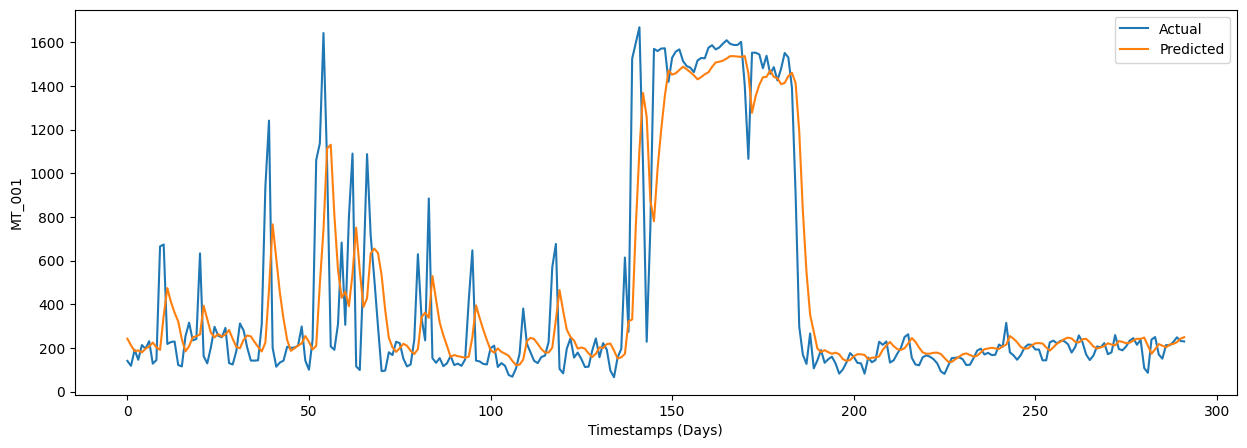

In [ ]:
y_pred_inv = scaler.inverse_transform(y_pred).flatten()
y_test_inv = scaler.inverse_transform(y_test).flatten()

print((len(y_pred_inv), len(y_test_inv)))

plt.figure(figsize=(15,5))
plt.plot(y_test_inv, label="Actual")
plt.plot(y_pred_inv, label="Predicted")
plt.xlabel("Timestamps (Days)")
plt.ylabel("MT_001")
plt.legend()
plt.show()

# Model Backup

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
backup_folder_path = "/gdrive/MyDrive/ESTIAM/E5/AI-ML-Model-Design/TimeSeries-Forecasting/backup"

In [ ]:
!mkdir -p "$backup_folder_path"

In [ ]:
scaler_file_path = f"{backup_folder_path}/scaler.joblib"
model_file_path = f"{backup_folder_path}/model.keras"

In [ ]:
import joblib

joblib.dump(scaler, scaler_file_path)
model.save(model_file_path)

In [ ]:
!ls "$backup_folder_path"

model.keras  scaler.joblib


# Model Loading & Manual Testing

## Loading

In [ ]:
from tensorflow import keras

loaded_scaler = joblib.load(scaler_file_path)
loaded_model = keras.models.load_model(model_file_path)

In [ ]:
loaded_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,885 (198.77 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,924 (132.52 KB)

## Testing

Select sampling data

In [ ]:
n_preds = 10
sample_data = serie[-(n_preds + context_window_size):]
sample_data

value
f64
214.467005
237.309645
107.86802
86.294416
238.57868
…
227.15736
248.730964
232.233503


Scale data with scaler

In [ ]:
scaled_sample_data = loaded_scaler.transform(sample_data.to_numpy().reshape(-1, 1)).flatten()
scaled_sample_data

array([0.12841945, 0.14209726, 0.06458967, 0.05167173, 0.14285714,
       0.14969605, 0.10182371, 0.09042553, 0.12765957, 0.1268997 ,
       0.13601824, 0.14893617, 0.13905775, 0.13753799, 0.00151976])

Format data to comply with model's expected input

In [ ]:
(input,) = create_forecast_serie_sets(scaled_sample_data, (context_window_size,))

input.shape

(10, 5)

Predict with model

In [ ]:
y_pred = loaded_model.predict(input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Display predicted value

In [ ]:
y_pred

array([[0.11612168],
       [0.13040867],
       [0.12612033],
       [0.12150446],
       [0.12904277],
       [0.13097364],
       [0.13561173],
       [0.1452327 ],
       [0.14924765],
       [0.14956155]], dtype=float32)

Display unscaled prediction

In [ ]:
predicted = scaler.inverse_transform(y_pred).flatten()
predicted

array([193.9291 , 217.78911, 210.62735, 202.91862, 215.50798, 218.73262,
       226.47847, 242.54599, 249.25114, 249.77539], dtype=float32)

(292, 292)


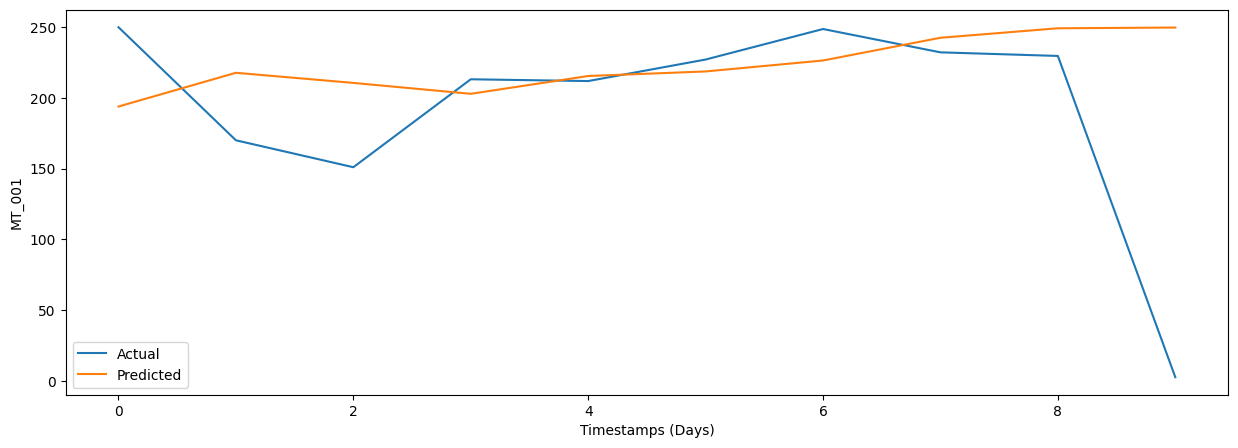

In [ ]:
expected = serie[-n_preds:].to_numpy()

print((len(y_pred_inv), len(y_test_inv)))

plt.figure(figsize=(15,5))
plt.plot(expected, label="Actual")
plt.plot(predicted, label="Predicted")
plt.xlabel("Timestamps (Days)")
plt.ylabel("MT_001")
plt.legend()
plt.show()